<a href="https://colab.research.google.com/github/MauricioMatheus/Data-Structures-U1T2/blob/main/AED2_U1T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
pip install nxviz

In [133]:
import networkx as nx
import pandas as pd
import numpy as np
import nxviz as nv
import matplotlib.pyplot as plt
from itertools import combinations
import IPython.display as Display
from IPython.display import HTML

In [134]:
filename = 'receitas_normalizadas.csv'
dados = pd.read_csv(filename, sep=';')
dados

,nome_receita,ingredientes,tipos_ingredientes
0,Bolo de Rolo,"FARINHA DE TRIGO, AÇÚCAR, MANTEIGA, OVO, DOCE ...","CARBOIDRATO, CARBOIDRATO, GORDURA, PROTEÍNA, F..."
1,Paçoca de Carne-de-Sol,"CARNE DE SOL, FARINHA DE MANDIOCA, CEBOLA, ALH...","PROTEÍNA, CARBOIDRATO, VEGETAL, VEGETAL, VEGET..."
2,Ginga com Tapioca,"GINGA, GOMA DE TAPIOCA, SAL, COENTRO, ÓLEO","PROTEÍNA, CARBOIDRATO, CONDIMENTO, VEGETAL, GO..."
3,Churrasco,"CORTES DE CARNE BOVINA, SAL GROSSO, ÓLEO","PROTEÍNA, CONDIMENTO, GORDURA"
4,Pirarucu Rondon,"PIRARUCU, LEITE DE COCO, TOMATE, CEBOLA, PIMEN...","PROTEÍNA, LATICÍNIO, VEGETAL, VEGETAL, VEGETAL..."
5,Paçoca de Carne com Banana,"CARNE DE SOL, FARINHA DE MANDIOCA, BANANA EM R...","PROTEÍNA, CARBOIDRATO, FRUTA, VEGETAL, VEGETAL..."
6,Polenta no Fio,"FUBÁ DE MILHO, ÁGUA, MANTEIGA, SAL, CAMARÕE","CARBOIDRATO, LATICÍNIO, GORDURA, CONDIMENTO, P..."
7,Chambari,"PEIXE CHAMBARI, TUCUPI, JAMBU, ALHO, CEBOLA, Ó...","PROTEÍNA, CONDIMENTO, VEGETAL, VEGETAL, VEGETA..."
8,Bolo de Fubá,"FUBÁ DE MILHO, AÇÚCAR, OVO, LEITE, ÓLEO, FERME...","CARBOIDRATO, CARBOIDRATO, PROTEÍNA, LATICÍNIO,..."
9,Pão de Queijo,"POLVILHO AZEDO, QUEIJO MINA, OVO, LEITE, ÓLEO,...","CARBOIDRATO, LATICÍNIO, PROTEÍNA, LATICÍNIO/OU..."


In [135]:
G = nx.Graph() #Gerando o grafo

#Percorrendo linha por linha e transformando cada coluna em uma lista organizada
for _, row in dados.iterrows():
  ingredientes = [i.strip() for i in row['ingredientes'].split(',')]
  tipos = [t.strip() for t in row['tipos_ingredientes'].split(',')]

  #Tupla retornando o nó e o tipo
  for ing, tipo in zip(ingredientes, tipos):
    G.add_node(ing, type=tipo)

  for u, v in combinations(ingredientes, 2):
    if G.has_edge(u, v):
      G[u][v]['weight'] += 1 #Se já houver uma ligação entre os ingredientes, aumenta o peso da aresta
    else:
      G.add_edge(u, v, weight=1) #Caso contrário, cria uma nova aresta com peso 1



In [136]:
#Fazendo o cálculo de assortatividade
assort = nx.attribute_assortativity_coefficient(G, 'type')
print(f'assortatividade por tipo de ingrediente: {assort:.4f}')

assortatividade por tipo de ingrediente: -0.0506


Obteve-se uma assortatividade negativa, o que representa uma heterofilia nos ingredientes, o que já era esperado. Isso significa que ingredientes tendem a ser usados juntos com ingredientes diferentes.

In [137]:
#Determinando as cores dos tipos de ingredientes

type_color = {
    'PROTEÍNA': 'blue',
    'VEGETAL': 'green',
    'CONDIMENTO': 'orange',
    'CARBOIDRATO': 'yellow',
    'OUTRO': 'brown',
    'LATICÍNIO': 'gray',
    'FRUTA': 'pink',
    'GORDURA': 'gold'
}

node_colors = [type_color[types[n]] for n in G.nodes()]



TypeError: BasePlot.draw() takes 0 positional arguments but 1 was given

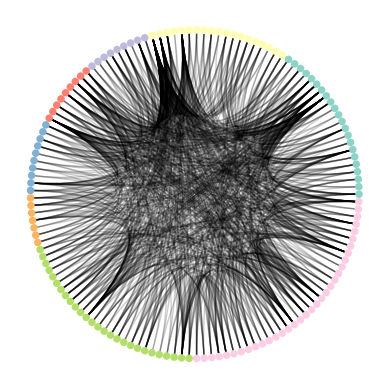

In [147]:
types = nx.get_node_attributes(G, 'type') #Extraindo o tipo de cada nó

ordered_types = ['PROTEÍNA', 'VEGETAL', 'CONDIMENTO', 'CARBOIDRATO', 'FRUTA', 'GORDURA', 'LATICÍNIO', 'OUTRO'] #Ordenando os tipos para uma visualização mais organizada

for n in G.nodes(): #Adicionando a cada nó o atributo group, que será utilizado para ordenação
    G.nodes[n]['group'] = types[n]

#Criando o CircosPlot
c = nv.CircosPlot(
    G,
    node_color='group',
    node_grouping='group',

)

fig = c.draw()
plt.show() # Use plt.show() to display the plot

No CircusPlot acima podemos visualizar a assortatividade negativa calculada anteriormente. É possível observar que a maioria dos ingredientes se relacionam mais com ingredientes diferentes, o que é algo justificável, pois do ponto de vista culinário eles se completam.

Por exemplo, proteínas geralmente são acompanhadas de temperos (condimentos) para ganhar sabor, da mesma forma que vegetais muitas vezes são acompanhados por proteínas. Em outras palavras, uma receita precisa de vários tipos de ingredientes diferentes para estar completa, e não apenas um.